<a href="https://colab.research.google.com/github/Zerokal-code/python-random-quote/blob/master/Longandshort_on_pref_PETR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
!pip install yfinance

In [45]:
import numpy as np
import pandas as pd
from datetime import datetime
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import yfinance as yf

In [46]:
ativos_spread = ['BBDC4.SA', 'ITUB4.SA']

In [47]:
data_spread_PETR = yf.download(ativos_spread, 
                               start = '2010-01-01', 
                               period = "1D")['Adj Close']

[*********************100%***********************]  2 of 2 completed


In [48]:
data_spread_PETR['Ratio_4_3'] = round((data_spread_PETR['BBDC4.SA']/
                                       data_spread_PETR['ITUB4.SA']),3)

data_spread_PETR

,BBDC4.SA,ITUB4.SA,Ratio_4_3
Date,,,
2010-01-04,10.301641,11.321162,0.910
2010-01-05,10.250585,11.394541,0.900
2010-01-06,10.168585,11.295774,0.900
2010-01-07,10.141242,11.180077,0.907
2010-01-08,10.130315,11.010763,0.920
...,...,...,...
2022-04-06,21.150000,26.730000,0.791
2022-04-07,21.240000,26.709999,0.795
2022-04-08,21.480000,26.660000,0.806


In [49]:
data_spread_PETR.Ratio_4_3.describe()

count    3045.000000
mean        0.843576
std         0.075001
min         0.665000
25%         0.795000
50%         0.837000
75%         0.883000
max         1.126000
Name: Ratio_4_3, dtype: float64

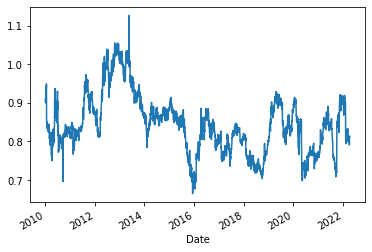

In [50]:
data_spread_PETR.Ratio_4_3.plot();

In [51]:
media_spread = round(np.mean(data_spread_PETR.Ratio_4_3),3)
sd1_min_spread = media_spread - round(np.std(data_spread_PETR.Ratio_4_3),3)
sd1_max_spread = media_spread + round(np.std(data_spread_PETR.Ratio_4_3),3)
sd2_min_spread = media_spread - (2* (round(np.std(data_spread_PETR.Ratio_4_3),3)))
sd2_max_spread = media_spread + (2* (round(np.std(data_spread_PETR.Ratio_4_3),3)))



In [52]:
fig = px.line(data_spread_PETR, x=data_spread_PETR.index, y=data_spread_PETR.Ratio_4_3)

fig.add_hline(y=media_spread, line_width=5, line_color="green")
fig.add_hline(y=sd1_min_spread, line_width=3, line_dash="dash", line_color="orange")
fig.add_hline(y=sd1_max_spread, line_width=3, line_dash="dash", line_color="orange")
fig.add_hline(y=sd2_min_spread, line_width=5, line_dash="dash", line_color="red")
fig.add_hline(y=sd2_max_spread, line_width=5, line_dash="dash", line_color="red")

fig.update_layout(xaxis_rangeslider_visible=False, title_text='Razão entre preço BBDC4 e ITUB4 (2010 e mar/2022)',template = 'simple_white',width=500,height=500)
fig.show()